In [1]:
import os

def change_dir_in_hipergator():
    # this env var is set on hipergator (SLURM is the job scheduler there)
    if os.getenv("SLURM_JOB_ID", None):
        target_dir = "diff_fam_social_memory_ephys"
        current = os.getcwd()

        while True:
            parent = os.path.dirname(current)
            # If we've reached the root directory without finding the target
            if parent == current:
                raise FileNotFoundError(f"Could not find parent directory '{target_dir}'")

            # Check if the target directory is the current parent's name
            if os.path.basename(parent) == target_dir:
                os.chdir(parent)
                return parent

            current = parent

# Usage
try:
    new_path = change_dir_in_hipergator()
    print(f"Successfully changed to directory: {new_path}")
except FileNotFoundError as e:
    print(e)
    

Successfully changed to directory: None


In [57]:
import pickle
import behavior.boris_extraction as boris
#import spike.spike_analysis. as spike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import sem
from itertools import combinations
import pandas as pd
import os
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))
    
behavior_dicts = unpickle_this("pilot2/cups_phase4/cups_r2_behavior_dicts.pkl")

del behavior_dicts['3.1']

In [66]:
cup_dict = {
            '2.2': ['cagemate', 'novel', 'familiar', 'empty'],
            '2.3': ['empty', 'cagemate', 'novel', 'familiar'],
            '3.1': ['familiar', 'empty', 'cagemate', 'novel'],
            '3.2': ['novel', 'familiar', 'empty', 'cagemate'],
            '4.1': ['cagemate', 'novel', 'familiar', 'empty'],
            '4.4':['empty', 'cagemate', 'novel', 'familiar'],
            }

color_dict = {
            '2.2': ['pink', 'orange', 'blue', 'green'],
            '2.3': ['blue', 'green', 'pink', 'orange'],
            '3.1': ['green','pink', 'orange', 'blue'],
            '3.2': ['pink', 'orange', 'blue', 'green'],
            '4.1': ['blue', 'green', 'pink', 'orange'],
            '4.4':['orange', 'blue', 'pink', 'green']
            }



In [ ]:

folder_path = r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\cups_round2\aggregated_csvs"
behavior_dicts = {}
# Loop through each file in the folder
for filename in os.listdir(folder_path):
    boris_excel = os.path.join(folder_path, filename)
    ex_boris = pd.read_csv(boris_excel)
    times = ex_boris[
        (ex_boris['Behavior'] == 'mouse in'
         ) | (ex_boris['Behavior'] == 'mouse out'
        )]['Start (s)'].values
    if filename == "44_cups_p8.1.csv":
        times = [605,1203, 1864]
    subject = filename.split("_")[0]
    subject = str(float(subject)/10)
    agentorder = cup_dict[subject]
    colororder = color_dict[subject]
    fam_behaviors = ["sniff cup " + str(agentorder.index('familiar') + 1),
                     "chew cup " + str(agentorder.index('familiar') + 1)]
    cagemate_behaviors = ["sniff cup " + str(agentorder.index('cagemate') + 1),
                     "chew cup " + str(agentorder.index('cagemate') + 1)]
    novel_behaviors = ["sniff cup " + str(agentorder.index('novel')+ 1),
                     "chew cup " + str(agentorder.index('novel')+ 1)]
    empty_behaviors = ["sniff cup " + str(agentorder.index('empty')+ 1),
                     "chew cup " + str(agentorder.index('empty')+ 1)]
    baseline_behaviors = ['sniff cup 1', 'chew cup 1',
                          'sniff cup 2', 'chew cup 2',
                          'sniff cup 3', 'chew cup 3',
                          'sniff cup 4', 'chew cup 4']
    fam_empty_behaviors = [item for item in baseline_behaviors if item not in fam_behaviors]
    baseline_df = ex_boris[ex_boris["Start (s)"] < times[0]]
    familiarization_df = ex_boris[(ex_boris["Start (s)"] > times[0]) &
                                  (ex_boris['Start (s)'] < times[1])]
    iti_df = ex_boris[(ex_boris["Start (s)"] > times[1]) &
                                  (ex_boris['Start (s)'] < times[2])]
    last10min_df = ex_boris[ex_boris["Start (s)"] > times[-1]]
    novel_array = boris.get_behavior_bouts(last10min_df, ["subject"], novel_behaviors)
    empty_array = boris.get_behavior_bouts(last10min_df, ["subject"], empty_behaviors)
    cagemate_array = boris.get_behavior_bouts(last10min_df, ["subject"], cagemate_behaviors)
    fam_array = boris.get_behavior_bouts(last10min_df, ["subject"], fam_behaviors)
    acq_array = boris.get_behavior_bouts(familiarization_df, ["subject"], fam_behaviors)
    empty_acq_array = boris.get_behavior_bouts(familiarization_df, ["subject"],
                                               fam_empty_behaviors)
    cup1_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
                                          ['sniff cup 1', 'chew cup 1'])
    cup2_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
                                          ['sniff cup 2', 'chew cup 2'])
    cup3_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
                                          ['sniff cup 3', 'chew cup 3'])
    cup4_array = boris.get_behavior_bouts(baseline_df, ['subject'], 
                                          ['sniff cup 4', 'chew cup 4'])
    cups_arrays = [cup1_array, cup2_array, cup3_array, cup4_array]
    
    behavior_dicts[subject] = {'cup 1': cup1_array,
                               'cup 2': cup2_array,
                               'cup 3': cup3_array,
                               'cup 4': cup4_array,
                               'acquisition': acq_array,
                               'empty acquisition': empty_acq_array,
                               'familiar': fam_array,
                               'novel': novel_array,
                               'cagemate':cagemate_array,
                               'empty': empty_array,
                               
                               'cagemate_baseline' : cups_arrays[int(agentorder.index('cagemate'))],
                                'familiar_baseline': cups_arrays[int(agentorder.index('familiar'))],
                                'novel_baseline': cups_arrays[int(agentorder.index('novel'))],
                                'empty_baseline': cups_arrays[int(agentorder.index('empty'))],
                                'pink': cups_arrays[colororder.index('pink')],
                                'orange': cups_arrays[colororder.index('orange')],
                                'blue': cups_arrays[colororder.index('blue')],
                                'green': cups_arrays[colororder.index('green')]}


                     
    pickle_this(behavior_dicts, "pilot2/cups_phase4/cups_r2_behavior_dicts.pkl")

0
1
2
3
0
1


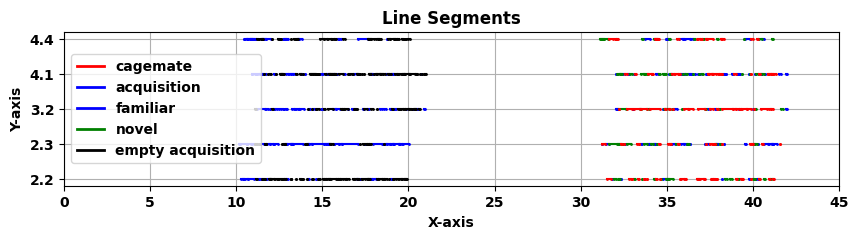

In [60]:
color_dict = {'cagemate': 'r', 'acquisition': 'b', 'familiar': 'b', 'novel': 'g',
              'empty acquisition' : 'k'}
recording_number = 0
plt.figure(figsize = (10,2))
labels = []
for name, recording in behavior_dicts.items():
    labels.append(name)
    for event, snippets in recording.items():
        if (event =='cagemate'
            ) | (event == 'familiar'
                 ) | (event == 'novel'
                      ) | (event == 'acquisition'
                    ) | (event == 'empty acquisition'):
            for i in range(len(snippets)):
                y = [recording_number,recording_number]
                x = snippets[i]/1000/60
            # Plot the line segments
                plt.plot(x, y, marker='o', linestyle='-', c= color_dict[event], markersize = 1)
    recording_number += .5
# Optionally, you can add labels, title, etc.
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.yticks(ticks=np.arange(len(labels))/2, labels=labels)
plt.title('Line Segments')
legend_labels = [plt.Line2D([0], [0], color=color_dict[label], lw=2, label=label) for label in color_dict]
plt.legend(handles=legend_labels)
plt.grid(True)
plt.xlim([0,45])
plt.show()

In [37]:
event_info = {}
sniff_itis = []
j = 0
total_sniffs = 0
subject_info = {}
for subject, behavior_dict in behavior_dicts.items():
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for i in range(len(events)):
            sniff_length_temp = events[i][1] - events[i][0]
            sniff_length = sniff_length + sniff_length_temp
            total_sniffs = total_sniffs + 1
            try:
                sniff_iti = events[i+1][0] - events[i][1]
                sniff_itis.append(sniff_iti)
            except IndexError:
                pass
        total_sniff_time = sniff_length/1000
        try:
            avg_event = sniff_length/no_events/1000
        except ZeroDivisionError:
            avg_event = 0
        if subject in event_info.keys():
            dict_event = event_info[subject]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[subject] =  dict_event
        else:
            event_info[subject] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    j += 1
sniff_itis = np.array(sniff_itis)/1000
sniff_itis 
overlapping_sniffs = 0 
for i in range(len(sniff_itis)):
    if sniff_itis[i] < 1:
        overlapping_sniffs = overlapping_sniffs + 1
print(overlapping_sniffs) # was 54 with old thresholding for less than 2, 142 for 5
print(total_sniffs)


255
1187


In [38]:
data_points = []
subjects = []
behaviors = []
for subject, dict in event_info.items():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for event, times in dict.items():
        #iterating through event
        event_list.append(times['total time'])
        behaviors.append(event)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
behaviors = behaviors[4:10]
print(behaviors)
print(data_points.shape)
data_points = data_points[4:10,:] 
print(data_points.shape)

['2.2', '2.3', '3.2', '4.1', '4.4']
['acquisition', 'empty acquisition', 'familiar', 'novel', 'cagemate', 'empty']
(10, 5)
(6, 5)


In [39]:
event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview
event_temp = event_overview.drop('level_0', axis = 1)
event_overview_averages = event_temp.groupby('level_1').mean()
event_overview_averages

,cup 1,cup 2,cup 3,cup 4,acquisition,empty acquisition,familiar,novel,cagemate,empty
level_1,,,,,,,,,,
avg event,3.188632,3.232441,3.876171,3.250712,5.948377,3.37679,4.703132,4.75493,5.675166,2.532642
no_events,24.200000,26.600000,26.400000,23.600000,28.600000,42.20000,16.600000,16.40000,22.600000,10.200000
total time,69.562800,75.460000,95.874400,73.656400,181.962000,145.76780,66.272400,73.93500,128.290000,20.853400


In [40]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_cup_time_averages = {}
for event in event_dict_keys:
    if 'cup' in event:
        avg_event = event_total_time[event].mean()
        event_cup_time_averages[event] = avg_event
event_cup_time_averages

{'cup 1': 69.5628,
 'cup 2': 75.46000000000001,
 'cup 3': 95.8744,
 'cup 4': 73.65639999999999}

In [41]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_agent_time_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = event_total_time[event].mean()
        sem_event = sem(event_total_time[event])
        event_agent_time_averages[event] = (avg_event, sem_event)
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
event_agent_time_averages

{'acquisition': (181.962, 62.01665991650952),
 'empty acquisition': (145.76779999999994, 30.031967678458827),
 'familiar': (66.2724, 16.056064591300057),
 'novel': (73.93500000000006, 6.495941186617917),
 'cagemate': (128.28999999999974, 42.7117920614437),
 'empty': (20.853400000000093, 5.478995707244091)}

['2.2', '2.3', '3.2', '4.1', '4.4']
acquisition
[ 80.401 424.912 158.803 117.533 128.161]
empty acquisition
[202.663  43.597 121.003 206.247 155.329]
familiar
[ 23.866 112.19   38.666  68.4    88.24 ]
novel
[69.666 98.131 71.733 71.331 58.814]
cagemate
[ 92.999  49.134 294.199 110.46   94.658]
empty
[18.466 14.8    9.468 41.534 19.999]


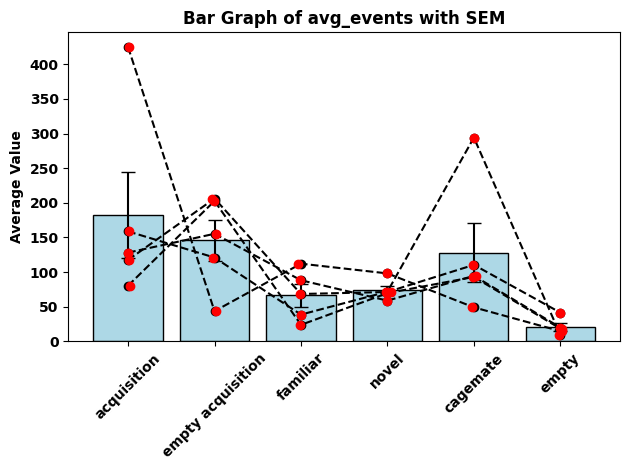

In [42]:
print(subjects)
x = np.arange(len(avg_events))
labels = event_agent_time_averages.keys()
# Create the bar plot
plt.bar(x, avg_events, yerr=sem_events, capsize=5, color='lightblue', edgecolor='black')
for i, group_data in enumerate(data_points):
    print(behaviors[i])
    print(data_points[i])
    # Spread the points a little horizontally to avoid overlap (add a small random jitter)
    jitter = np.random.normal(0, 0.02, size=len(group_data))
    plt.scatter([i + jitter_val for jitter_val in jitter], group_data, color='red', zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)

# Add labels and title
plt.xticks(x, labels, rotation = 45)
plt.ylabel('Average Value')
plt.title('Bar Graph of avg_events with SEM')

# Show the plot
plt.tight_layout()
plt.show()



In [43]:
event_agent_time_averages 
avg_events = [event_agent_time_averages['novel'][0], 
              event_agent_time_averages['familiar'][0],
              event_agent_time_averages['cagemate'][0]]
sem_events = [event_agent_time_averages['novel'][1], 
              event_agent_time_averages['familiar'][1],
              event_agent_time_averages['cagemate'][1]]


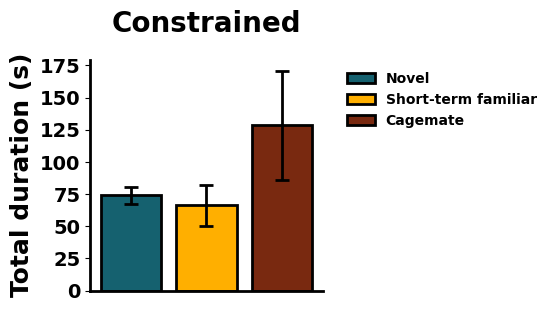

In [44]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                'cagemate': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(color_id_dict.keys(), avg_events, yerr = sem_events,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('Total duration (s)', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['novel'], edgecolor='black', linewidth=2, label='Novel'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['short-term familiar'], edgecolor='black', linewidth=2, label='Short-term familiar'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['cagemate'], edgecolor='black', linewidth=2, label='Cagemate')
]

# Add the legend
plt.legend(handles=legend_elements, fontsize=10, frameon=False, loc='best', bbox_to_anchor=(1.05, 1))

In [45]:
total_time_df = event_overview[event_overview['level_1'] == 'total time']
avg_event_df = event_overview[event_overview['level_1'] == 'avg event']
no_events_df = event_overview[event_overview['level_1'] == 'no_events']

total_time_long_df = pd.melt(total_time_df, id_vars = ['level_0'],
                            value_vars = ['novel', 'cagemate','familiar'],
                            var_name = 'condition', value_name = 'time')

total_time_long_df

,level_0,condition,time
0,2.2,novel,69.666
1,2.3,novel,98.131
2,3.2,novel,71.733
3,4.1,novel,71.331
4,4.4,novel,58.814
5,2.2,cagemate,92.999
6,2.3,cagemate,49.134
7,3.2,cagemate,294.199
8,4.1,cagemate,110.460
9,4.4,cagemate,94.658


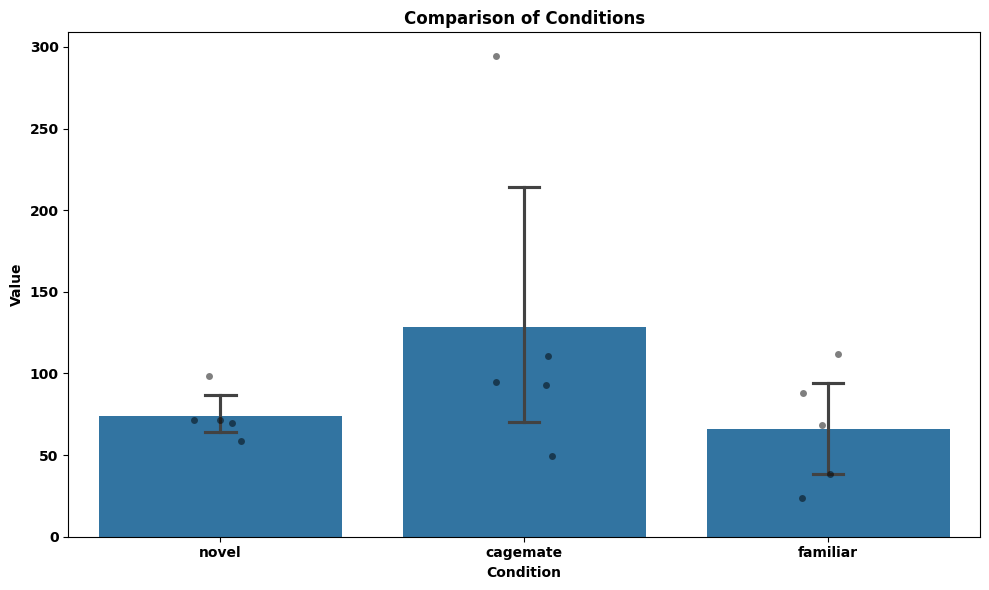

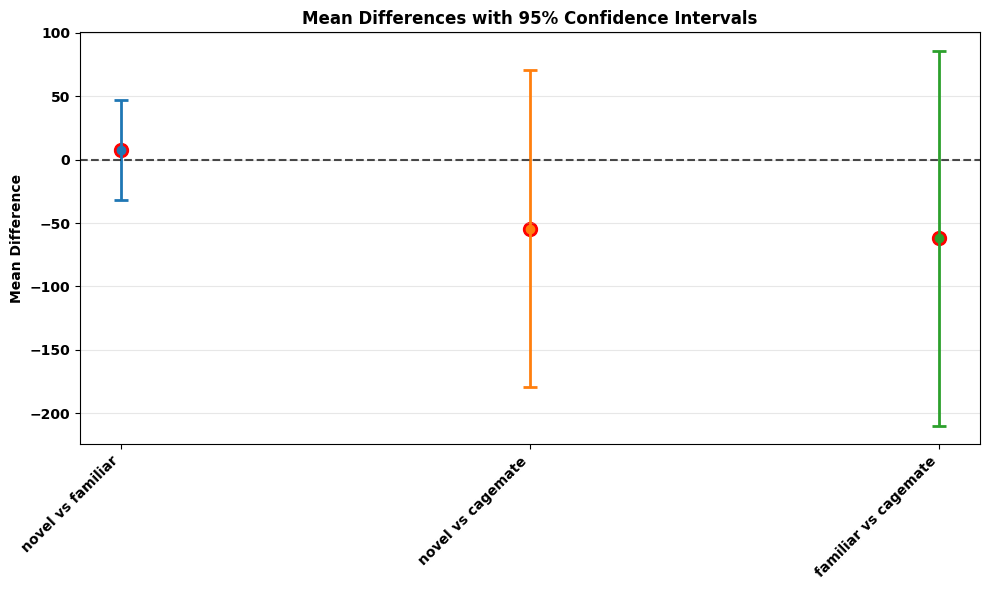

,Comparison,t-statistic,p-value,p-value (Holm),Significant,Mean Difference,CI Lower,CI Upper
0,novel vs familiar,0.543897,0.615409,0.880549,False,7.6626,-31.452895,46.778095
1,novel vs cagemate,-1.208190,0.293516,0.880549,False,-54.3550,-179.263863,70.553863
2,familiar vs cagemate,-1.165466,0.308590,0.880549,False,-62.0176,-209.759789,85.724589


In [46]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

def paired_ttest_with_holm(data, conditions, subject_col='subject', value_col='value', alpha=0.05):
    """
    Perform paired t-tests between all pairs of conditions with Holm-Bonferroni correction.
    
    Parameters:
    -----------
    data : pandas DataFrame
        Data in long format with one row per subject-condition combination
    conditions : list
        List of condition names to compare
    subject_col : str
        Name of the column containing subject identifiers
    value_col : str
        Name of the column containing the measurement values
    alpha : float
        Significance level (default: 0.05)
    
    Returns:
    --------
    results_df : pandas DataFrame
        DataFrame containing the results of all pairwise comparisons
    """
    # Get all pairs of conditions
    pairs = [(c1, c2) for i, c1 in enumerate(conditions) for c2 in conditions[i+1:]]
    
    # Initialize lists to store results
    pair_names = []
    t_values = []
    p_values = []
    mean_diffs = []
    ci_lows = []
    ci_highs = []
    
    # Perform paired t-test for each pair
    for cond1, cond2 in pairs:
        # Get data for each condition, ensuring same subjects in both
        df1 = data[data['condition'] == cond1][[subject_col, value_col]].set_index(subject_col)
        df2 = data[data['condition'] == cond2][[subject_col, value_col]].set_index(subject_col)
        
        # Match subjects
        common_subjects = df1.index.intersection(df2.index)
        if len(common_subjects) == 0:
            raise ValueError(f"No common subjects found between {cond1} and {cond2}")
        
        values1 = df1.loc[common_subjects, value_col].values
        values2 = df2.loc[common_subjects, value_col].values
        
        # Perform paired t-test
        t_stat, p_val = stats.ttest_rel(values1, values2)
        
        # Calculate mean difference and confidence interval
        diff = values1 - values2
        mean_diff = np.mean(diff)
        
        # 95% confidence interval
        n = len(diff)
        sem = stats.sem(diff)
        ci_low, ci_high = stats.t.interval(1-alpha, n-1, loc=mean_diff, scale=sem)
        
        # Store results
        pair_names.append(f"{cond1} vs {cond2}")
        t_values.append(t_stat)
        p_values.append(p_val)
        mean_diffs.append(mean_diff)
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)
    
    # Apply Holm-Bonferroni correction
    reject, p_corrected, _, _ = multipletests(p_values, alpha=alpha, method='holm')
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'Comparison': pair_names,
        't-statistic': t_values,
        'p-value': p_values,
        'p-value (Holm)': p_corrected,
        'Significant': reject,
        'Mean Difference': mean_diffs,
        'CI Lower': ci_lows,
        'CI Upper': ci_highs
    })
    
    # Sort by corrected p-value
    results_df = results_df.sort_values('p-value (Holm)')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='condition', y=data[value_col], data=data, capsize=0.1)
    sns.stripplot(x='condition', y=data[value_col], data=data, color='black', alpha=0.5)
    plt.title('Comparison of Conditions')
    plt.ylabel('Value')
    plt.xlabel('Condition')
    plt.tight_layout()
    plt.show()

    # Optional: Visualize the mean differences with confidence intervals
    plt.figure(figsize=(10, 6))
    for i, (idx, row) in enumerate(results_df.iterrows()):
        plt.errorbar(
            x=i, 
            y=row['Mean Difference'],
            yerr=[[row['Mean Difference']-row['CI Lower']], [row['CI Upper']-row['Mean Difference']]],
            fmt='o', capsize=5, capthick=2, elinewidth=2
        )
        color = 'green' if row['Significant'] else 'red'
        plt.scatter(i, row['Mean Difference'], color=color, s=100)

    plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
    plt.xticks(range(len(results_df)), results_df['Comparison'], rotation=45, ha='right')
    plt.title('Mean Differences with 95% Confidence Intervals')
    plt.ylabel('Mean Difference')
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return results_df

conditions = ['novel', 'familiar', 'cagemate']
subjects = event_overview['level_0'].unique  # 10 subjects

# Run the analysis
paired_ttest_with_holm(total_time_long_df, conditions, subject_col='level_0', value_col='time')



In [47]:
total_time_df['total social'] = total_time_df[['novel', 'familiar', 'cagemate']].sum(axis=1)
total_time_df['cagemate preference'] = total_time_df['cagemate'] / total_time_df['total social']
total_time_df['familiar preference'] = total_time_df['familiar'] / total_time_df['total social']
total_time_df['novel preference'] = total_time_df['novel'] / total_time_df['total social']

total_time_df

C:\Users\megha\AppData\Local\Temp\ipykernel_29748\2834043516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_df['total social'] = total_time_df[['novel', 'familiar', 'cagemate']].sum(axis=1)
C:\Users\megha\AppData\Local\Temp\ipykernel_29748\2834043516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_df['cagemate preference'] = total_time_df['cagemate'] / total_time_df['total social']
C:\Users\megha\AppData\Local\Temp\ipykernel_29748\2834043516.py:3: SettingWithCopyWarning: 
A va

,level_0,level_1,cup 1,cup 2,cup 3,cup 4,acquisition,empty acquisition,familiar,novel,cagemate,empty,total social,cagemate preference,familiar preference,novel preference
2,2.2,total time,78.529,93.404,66.065,81.064,80.401,202.663,23.866,69.666,92.999,18.466,186.531,0.498571,0.127947,0.373482
5,2.3,total time,85.724,81.849,106.457,26.664,424.912,43.597,112.190,98.131,49.134,14.800,259.455,0.189374,0.432406,0.378220
8,3.2,total time,65.265,81.132,62.531,87.799,158.803,121.003,38.666,71.733,294.199,9.468,404.598,0.727139,0.095566,0.177294
11,4.1,total time,64.790,75.659,180.310,72.997,117.533,206.247,68.400,71.331,110.460,41.534,250.191,0.441503,0.273391,0.285106
14,4.4,total time,53.506,45.256,64.009,99.758,128.161,155.329,88.240,58.814,94.658,19.999,241.712,0.391615,0.365063,0.243323


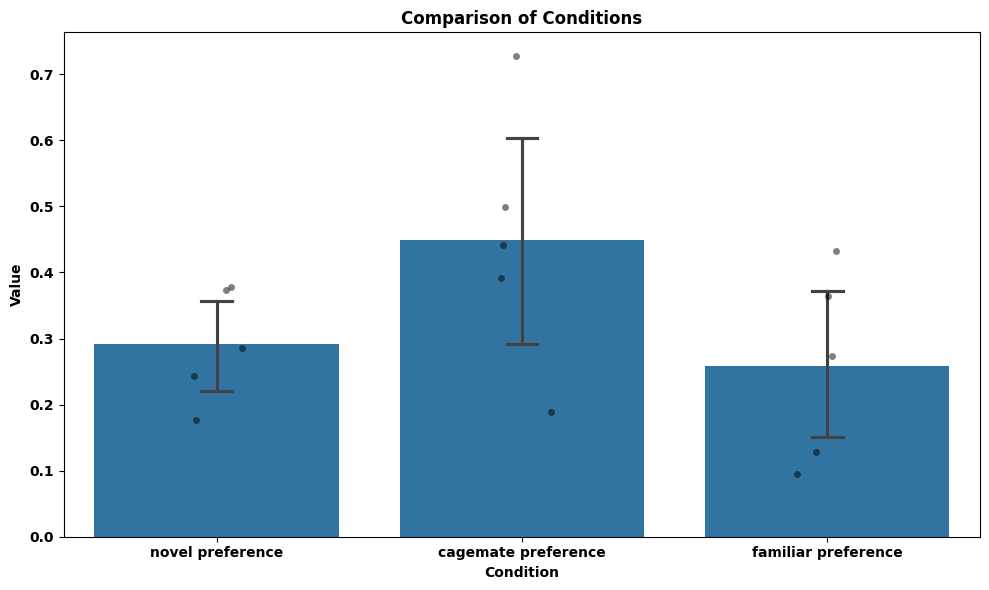

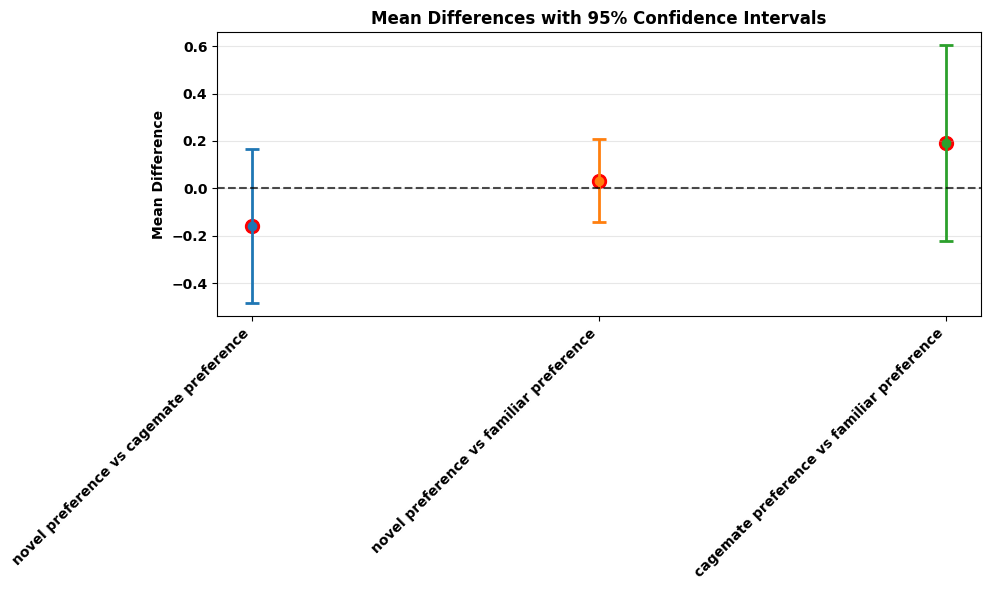

,Comparison,t-statistic,p-value,p-value (Holm),Significant,Mean Difference,CI Lower,CI Upper
0,novel preference vs cagemate preference,-1.348694,0.248734,0.746203,False,-0.158155,-0.483737,0.167426
1,novel preference vs familiar preference,0.517092,0.632370,0.746203,False,0.032610,-0.142486,0.207707
2,cagemate preference vs familiar preference,1.282765,0.268861,0.746203,False,0.190766,-0.222132,0.603663


In [48]:
preference_long_df = pd.melt(total_time_df, id_vars = ['level_0'],
                            value_vars = ['novel preference', 'cagemate preference','familiar preference'],
                            var_name = 'condition', value_name = 'preference')
preference_long_df
paired_ttest_with_holm(preference_long_df, ['novel preference', 'cagemate preference','familiar preference'], subject_col='level_0', value_col='preference')


In [49]:

event_agent_preference_averages = {}
avg_events = []
sem_events = []
for event in ['novel preference', 'cagemate preference','familiar preference']:
    avg_event = total_time_df[event].mean()
    sem_event = sem(total_time_df[event])
    event_agent_preference_averages[event] = (avg_event, sem_event)
    avg_events.append(avg_event)
    sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
event_agent_preference_averages

event_agent_preference_averages 
avg_events = [event_agent_preference_averages['novel preference'][0], 
              event_agent_preference_averages['familiar preference'][0],
              event_agent_preference_averages['cagemate preference'][0]]
sem_events = [event_agent_preference_averages['novel preference'][1], 
              event_agent_preference_averages['familiar preference'][1],
              event_agent_preference_averages['cagemate preference'][1]]

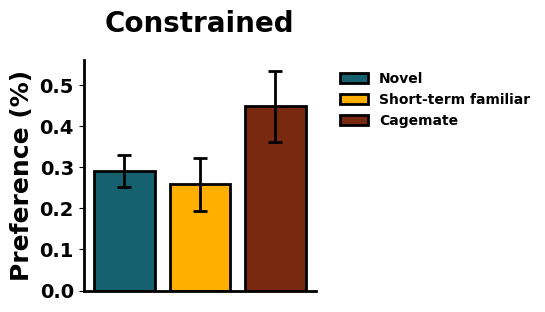

In [50]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                'cagemate': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(color_id_dict.keys(), avg_events, yerr = sem_events,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('Preference (%)', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['novel'], edgecolor='black', linewidth=2, label='Novel'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['short-term familiar'], edgecolor='black', linewidth=2, label='Short-term familiar'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['cagemate'], edgecolor='black', linewidth=2, label='Cagemate')
]

# Add the legend
plt.legend(handles=legend_elements, fontsize=10, frameon=False, loc='best', bbox_to_anchor=(1.05, 1))

In [51]:
data_points = []
subjects = []
behaviors = []
for subject in total_time_df['level_0'].unique():
    #iterating through subject
    event_list = []
    subjects.append(subject)
    for preference in ['novel preference','cagemate preference']:
        #iterating through event
        event_list.append(total_time_df[preference][total_time_df['level_0'] == subject].values[0])
        behaviors.append(preference)
    data_points.append(event_list)
data_points = np.array(data_points).T
print(subjects)
print(behaviors)
print(data_points.shape)
print(data_points.shape)

['2.2', '2.3', '3.2', '4.1', '4.4']
['novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference', 'novel preference', 'cagemate preference']
(2, 5)
(2, 5)


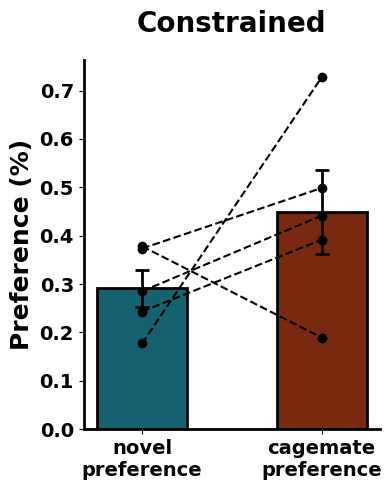

In [52]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'
plt.figure(figsize= (4,5))    
labels = ['novel\npreference', 'cagemate\npreference']
# Create the bar plot
plt.bar([0,1], [avg_events[0], avg_events[2]],
        yerr=[sem_events[0],
        sem_events[2]],
        capsize=5,
         linewidth = 2,
        error_kw={'elinewidth': 2, 'capthick': 2},
        color=['#15616F', '#792910'], edgecolor='black',
        width = 0.5)
# for i, group_data in enumerate(data_points):
#     print(behaviors[i])
#     print(data_points[i])
#     # Spread the points a little horizontally to avoid overlap (add a small random jitter)
#     jitter = np.random.normal(0, 0.02, size=len(group_data))
#     plt.scatter([i + jitter_val for jitter_val in jitter], group_data, color='red', zorder=5)
for j in range(len(data_points[0])):  # Assuming all groups have the same number of data points
    x_vals = np.arange(len(data_points))  # X positions for all groups
    y_vals = [data_points[i][j] for i in range(len(data_points))]  # Y values for the same index
    plt.plot(x_vals, y_vals, color='black', linestyle='--', marker='o', zorder=4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Add labels and title
plt.xticks([0,1], labels, rotation = 0)
plt.ylabel('Preference (%)', fontsize = 18)


# Show the plot
plt.tight_layout()
plt.show()

In [53]:
avg_event_df_trim = avg_event_df[[ 'novel','familiar', 'cagemate']]
avg_event_df_trim


,novel,familiar,cagemate
1,4.098000,3.409429,3.321393
4,6.133187,4.155185,2.586000
7,6.521182,3.866600,12.791261
10,3.101348,2.280000,4.418400
13,3.920933,9.804444,5.258778


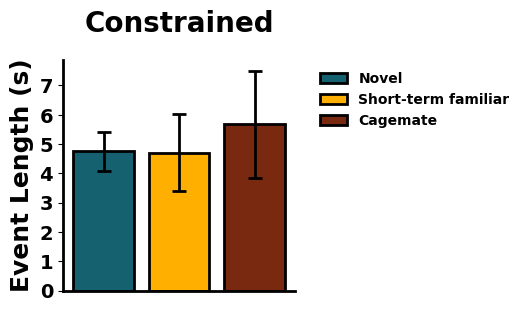

In [54]:



plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                'cagemate': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(avg_event_df_trim.mean().index, avg_event_df_trim.mean().values, yerr = avg_event_df_trim.sem().values,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('Event Length (s)', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['novel'], edgecolor='black', linewidth=2, label='Novel'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['short-term familiar'], edgecolor='black', linewidth=2, label='Short-term familiar'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['cagemate'], edgecolor='black', linewidth=2, label='Cagemate')
]

# Add the legend
plt.legend(handles=legend_elements, fontsize=10, frameon=False, loc='best', bbox_to_anchor=(1.05, 1))

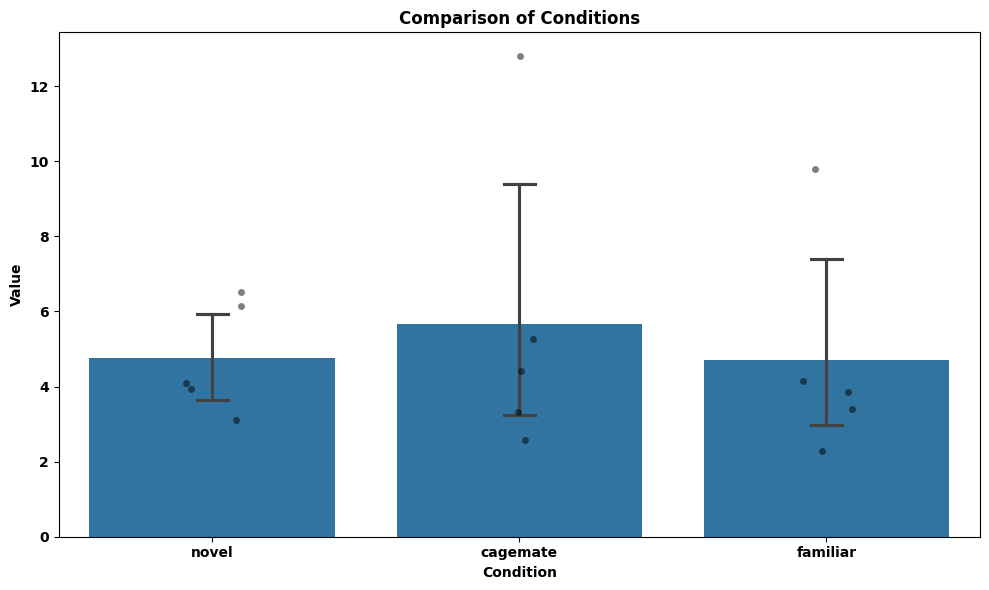

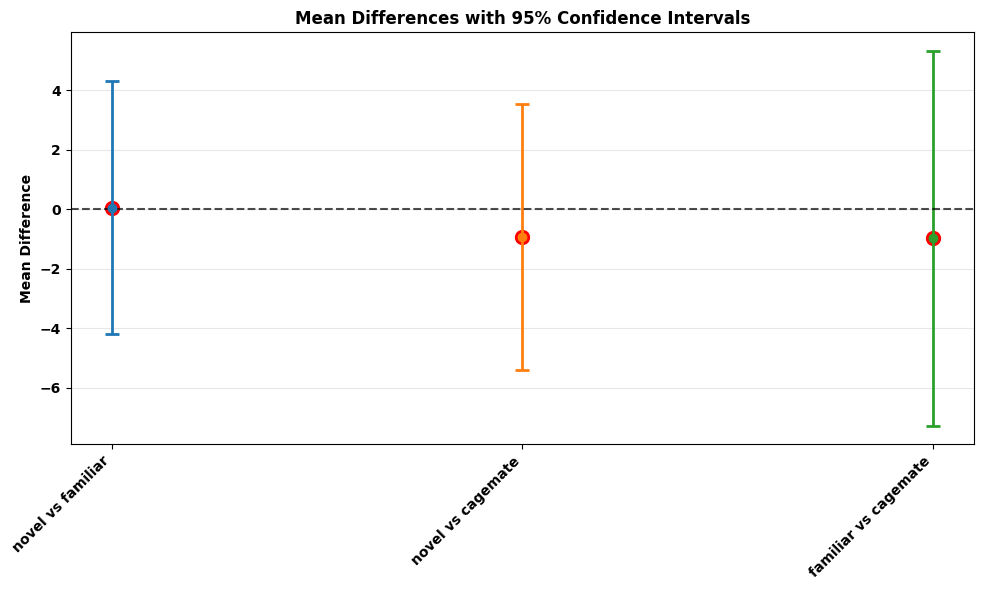

,Comparison,t-statistic,p-value,p-value (Holm),Significant,Mean Difference,CI Lower,CI Upper
0,novel vs familiar,0.033894,0.974585,1.0,False,0.051798,-4.191275,4.294872
1,novel vs cagemate,-0.571863,0.598017,1.0,False,-0.920236,-5.388063,3.547591
2,familiar vs cagemate,-0.429098,0.689953,1.0,False,-0.972035,-7.261502,5.317433


In [55]:

avg_event_long_df = pd.melt(avg_event_df, id_vars = ['level_0'],
                            value_vars = ['novel', 'cagemate','familiar'],
                            var_name = 'condition', value_name = 'time')

conditions = ['novel', 'familiar', 'cagemate']
subjects = event_overview['level_0'].unique  # 10 subjects

# Run the analysis
paired_ttest_with_holm(avg_event_long_df, conditions, subject_col='level_0', value_col='time')


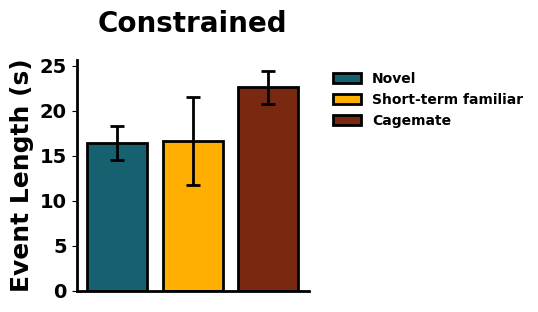

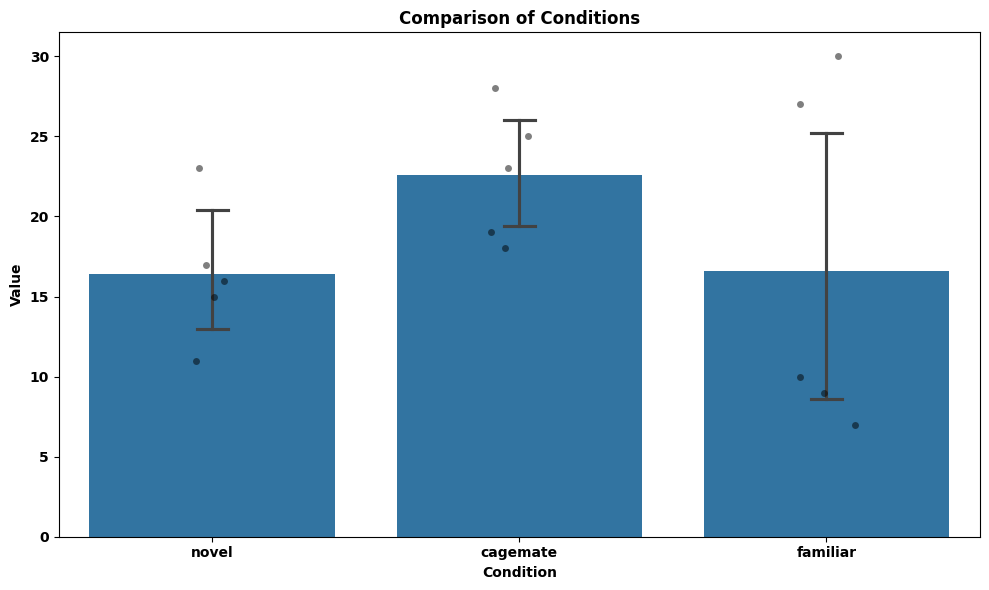

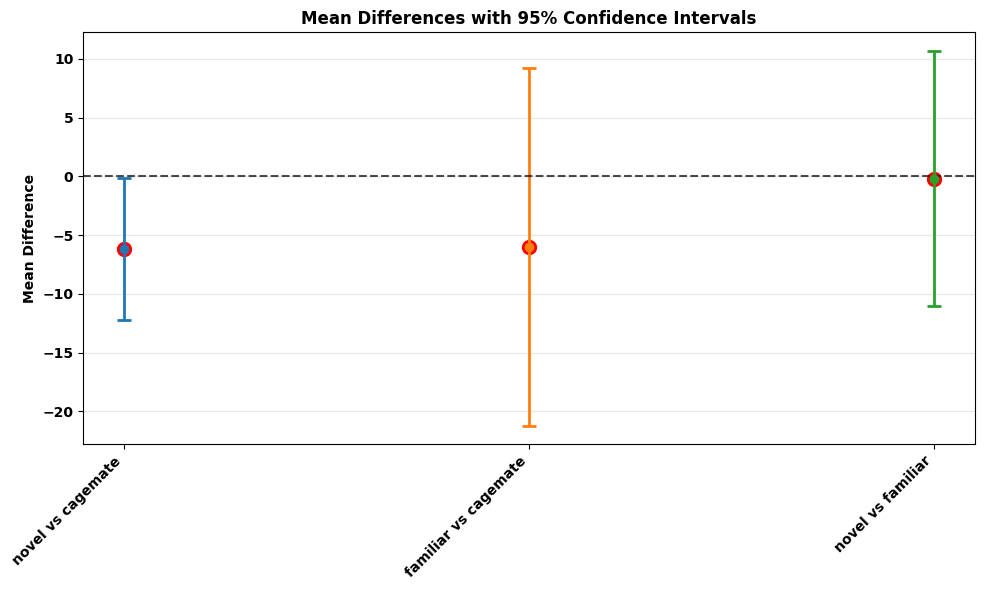

,Comparison,t-statistic,p-value,p-value (Holm),Significant,Mean Difference,CI Lower,CI Upper
1,novel vs cagemate,-2.847754,0.046501,0.139504,False,-6.2,-12.244749,-0.155251
2,familiar vs cagemate,-1.095445,0.334852,0.669705,False,-6.0,-21.207216,9.207216
0,novel vs familiar,-0.051064,0.961723,0.961723,False,-0.2,-11.074312,10.674312


In [56]:
no_events_df_trim = no_events_df[[ 'novel','familiar', 'cagemate']]


plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                'cagemate': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(no_events_df_trim.mean().index, no_events_df_trim.mean().values, yerr = no_events_df_trim.sem().values,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('Event Length (s)', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['novel'], edgecolor='black', linewidth=2, label='Novel'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['short-term familiar'], edgecolor='black', linewidth=2, label='Short-term familiar'),
    plt.Rectangle((0, 0), 1, 1, facecolor=color_id_dict['cagemate'], edgecolor='black', linewidth=2, label='Cagemate')
]

# Add the legend
plt.legend(handles=legend_elements, fontsize=10, frameon=False, loc='best', bbox_to_anchor=(1.05, 1))

no_events_long_df = pd.melt(no_events_df, id_vars = ['level_0'],
                            value_vars = ['novel', 'cagemate','familiar'],
                            var_name = 'condition', value_name = 'no events')

conditions = ['novel', 'familiar', 'cagemate']
subjects = event_overview['level_0'].unique  # 10 subjects

# Run the analysis
paired_ttest_with_holm(no_events_long_df, conditions, subject_col='level_0', value_col='no events')